<a href="https://colab.research.google.com/github/shaswatisahoo/netflix_analysis/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Netflix Analysis by Shaswati Sahoo**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot

In [84]:
netflix=pd.read_csv('netflix.csv')

In [87]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [88]:
netflix.shape

(7787, 12)

In [89]:
netflix.groupby(['type']).show_id.count()

type
Movie      5377
TV Show    2410
Name: show_id, dtype: int64

In [90]:
netflix_shows=netflix[netflix['type']=='TV Show']

In [91]:
netflix_movies=netflix[netflix['type']=='Movie']

Movies and TV shows released per year

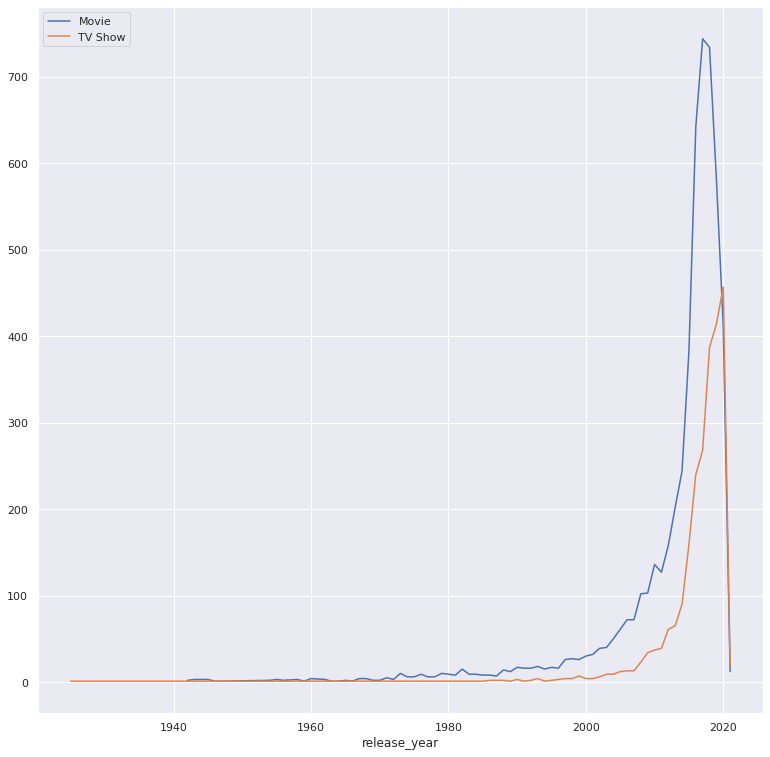

In [92]:
movie = netflix.loc[netflix['type'] == 'Movie']
tv = netflix.loc[netflix['type'] == 'TV Show']
movie.groupby('release_year').show_id.count().plot()
tv.groupby('release_year').show_id.count().plot()
plt.legend(['Movie','TV Show'])

Comparison of TV Shows and Movies

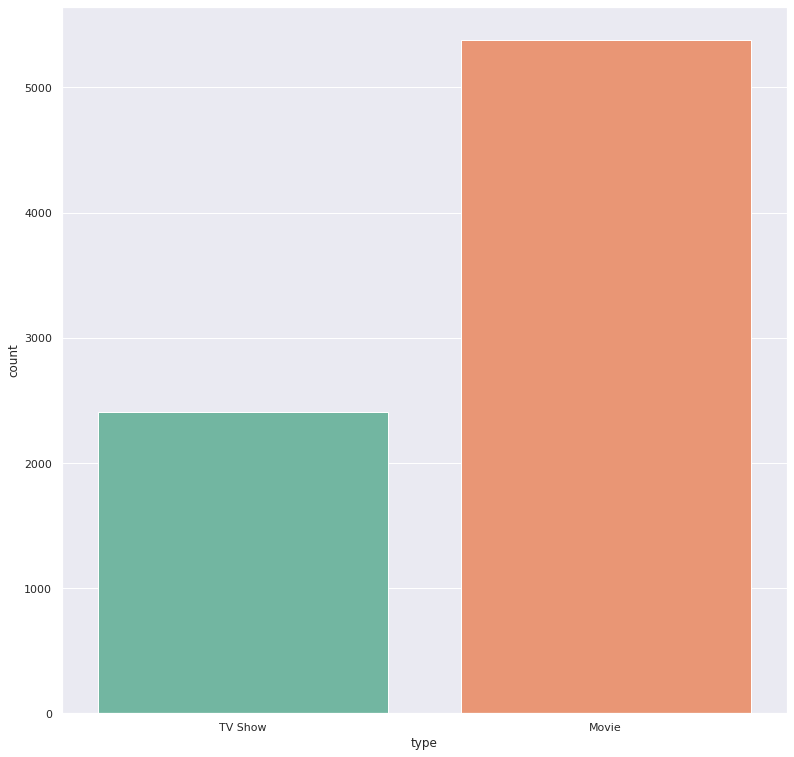

In [93]:
ax = sns.countplot(x="type", data=netflix, palette="Set2")

Frequency of content released per month

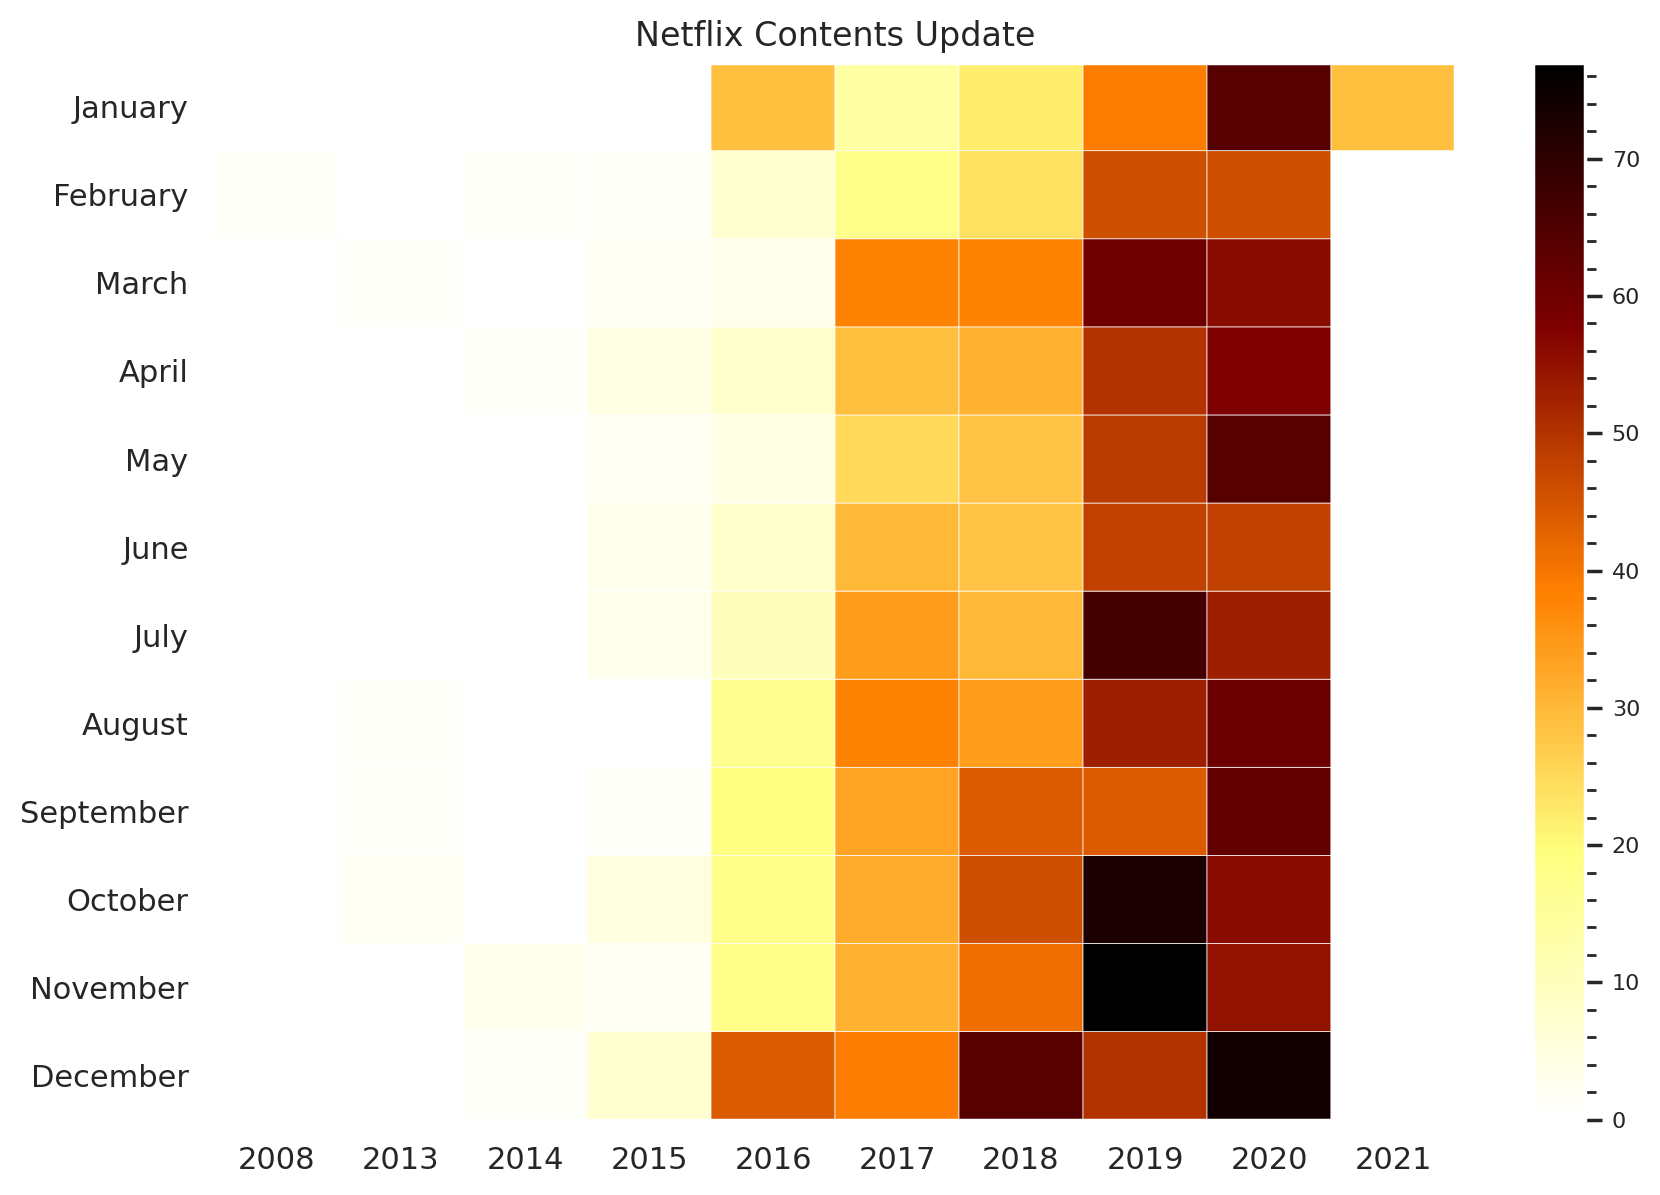

In [120]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white')
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)

plt.title('Netflix Contents Update')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()


# Analysis of Movies on Netflix

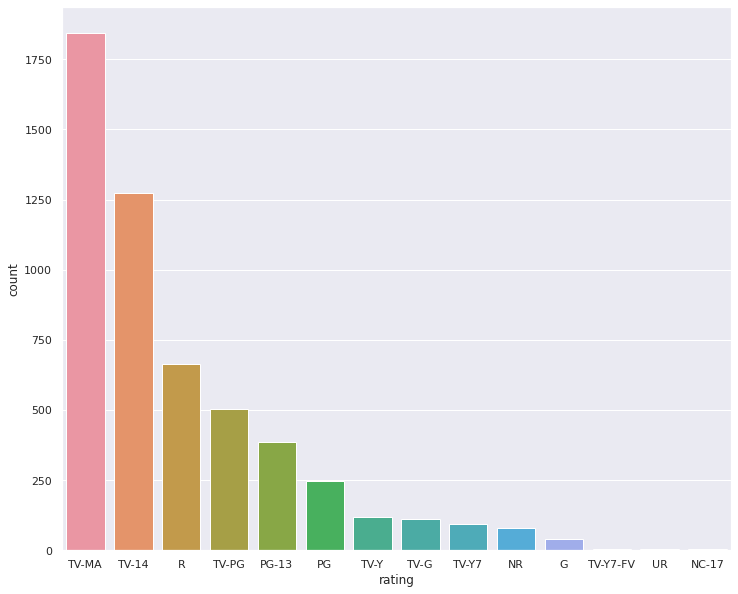

In [96]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, order=netflix_movies['rating'].value_counts().index[0:15])

In [97]:
imdb_ratings=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])

In [ ]:
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])

Data analysis to get Top Rated movies

In [101]:
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings

,Title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"
...,...,...,...,...
85850,Le lion,2020,5.3,Comedy
85851,De Beentjes van Sint-Hildegard,2020,7.7,"Comedy, Drama"
85852,Padmavyuhathile Abhimanyu,2019,7.9,Drama
85853,Sokagin Çocuklari,2019,6.4,"Drama, Family"


In [104]:
ratings.dropna()
joint_data=ratings.merge(netflix,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [105]:
top_rated=joint_data[0:10]
top_rated

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
991,Innocent,2017,9.0,Comedy,s3009,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
1002,Breakout,2019,9.0,"Adventure, Comedy, Drama",s1093,TV Show,Breakout,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,"July 1, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
398,Pulp Fiction,1994,8.9,"Crime, Drama",s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
380,Schindler's List,1993,8.9,"Biography, Drama, History",s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1301,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru..."
1669,Much Ado About Nothing,2011,8.6,"Comedy, Romance",s4266,Movie,Much Ado About Nothing,Alejandro Fernández Almendras,"Agustín Silva, Paulina García, Daniel Alcaíno,...","Chile, United States, France","October 1, 2016",2016,TV-MA,96 min,"Dramas, Independent Movies, International Movies",Carefree college student Vicente ends up in a ...
227,Gol Maal,1979,8.6,"Comedy, Romance",s2464,Movie,Gol Maal,Hrishikesh Mukherjee,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",India,"December 31, 2019",1979,TV-PG,137 min,"Classic Movies, Comedies, International Movies",When circumstances at work compel Ram to prete...
736,City of God,2002,8.6,"Crime, Drama",s1401,Movie,City of God,"Fernando Meirelles, Katia Lund","Alexandre Rodrigues, Leandro Firmino, Phellipe...","Brazil, France, Germany","January 1, 2020",2002,R,130 min,"Dramas, Independent Movies, International Movies","Growing up in a Rio de Janeiro slum, Rocket is..."
2669,Ani... Dr. Kashinath Ghanekar,2018,8.6,Drama,s527,Movie,Ani... Dr. Kashinath Ghanekar,Abhijeet Deshpande,"Subodh Bhave, Vaidehi Parshurami, Nandita Patk...",India,"September 10, 2020",2018,TV-14,157 min,"Dramas, International Movies",From his singular career to his personal demon...
609,Koshish,1972,8.6,Drama,s3443,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,"December 31, 2019",1972,TV-14,115 min,"International Movies, Romantic Movies",A speech and hearing-impaired couple persists ...


Countries with Highest Rated Content

In [106]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


In [107]:
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

Year-wise analysis

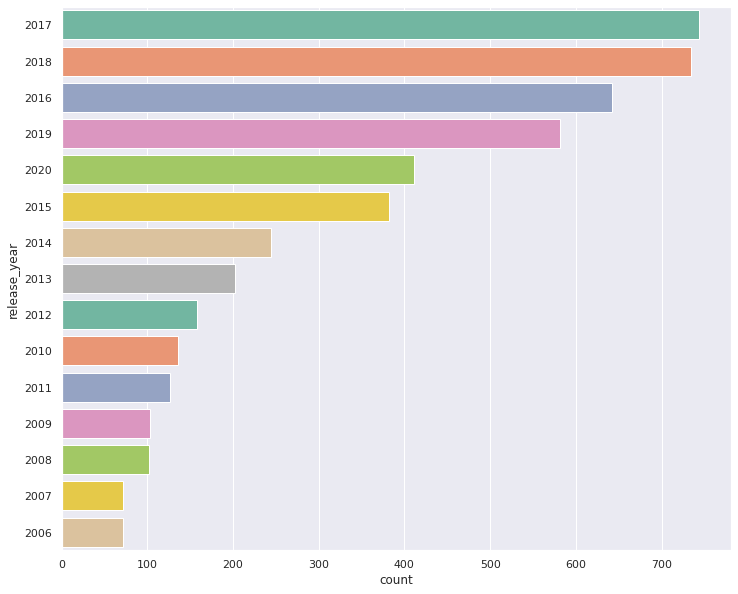

In [108]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

WordCloud for Genres

In [116]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

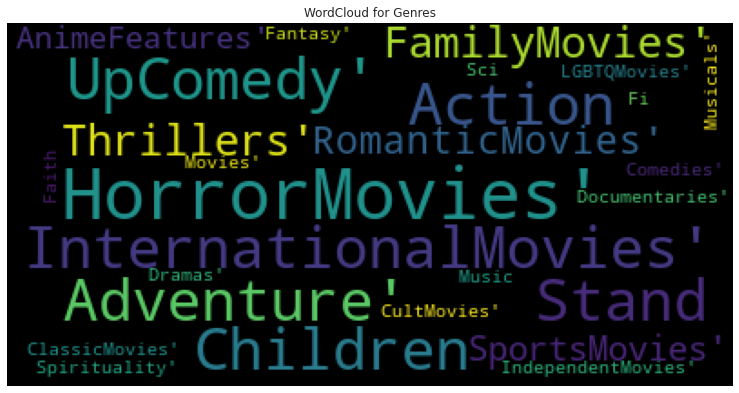

In [117]:
from wordcloud import WordCloud, STOPWORDS

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))

plt.title('WordCloud for Genres')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Lollipop plot of Genres vs their count on Netflix

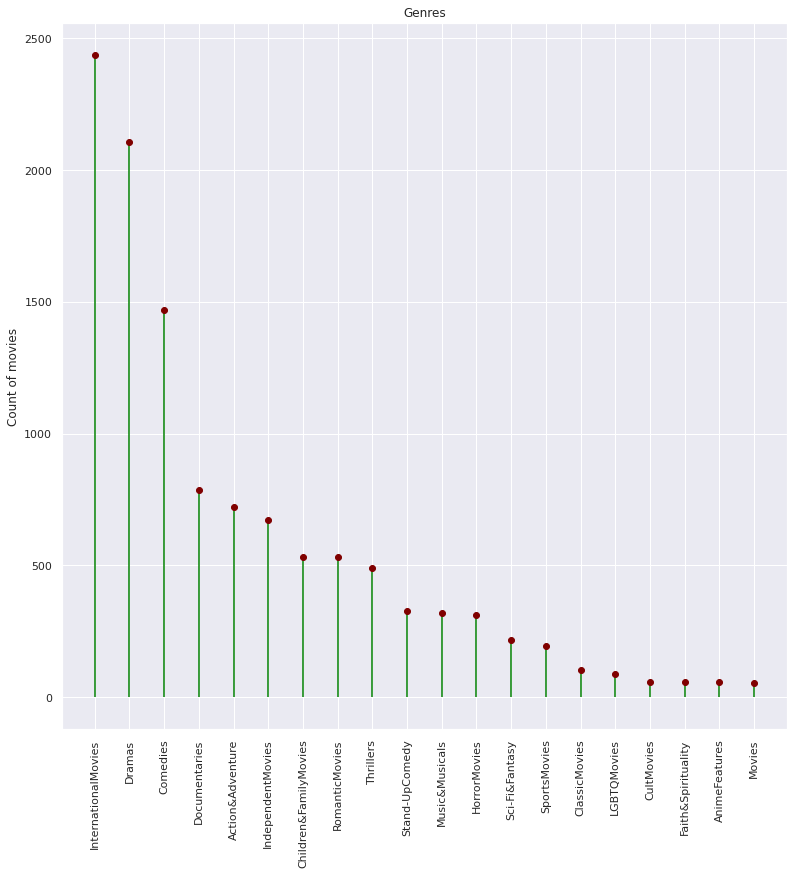

<Figure size 720x720 with 0 Axes>

In [118]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

# Analysis of TV Series on Netflix

TV Shows with maximum number of seasons

In [139]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

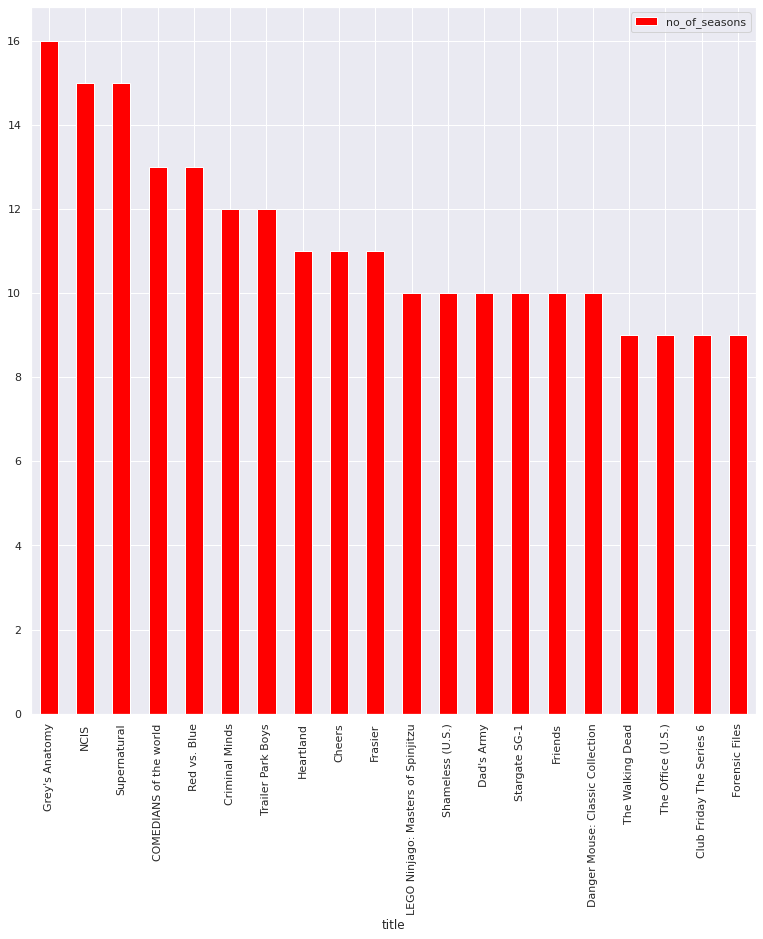

In [140]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

TV Shows with least number of seasons

In [141]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

WordCloud for Genres

In [66]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

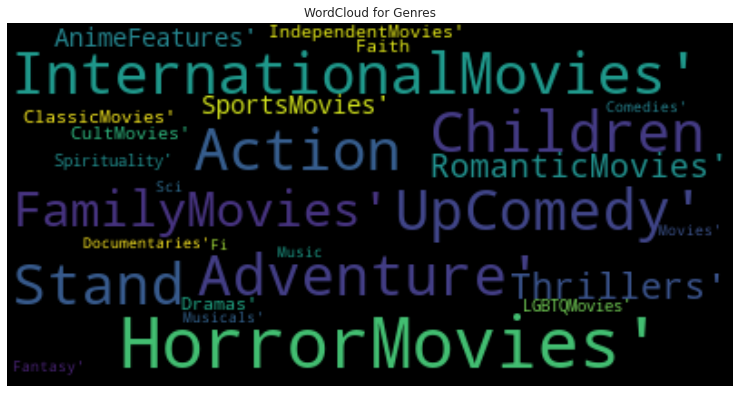

In [144]:
text = list(set(gen))

wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)

plt.title('WordCloud for Genres')
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Newest and Oldest US TV Shows 

In [145]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [146]:
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show()

In [147]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()